In [2]:
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
import pgmpy as pgm
from sklearn.decomposition import PCA
import useful

%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = [16, 9]
matplotlib.rcParams['figure.dpi'] = 150

In [3]:
data = np.load('../chorales_vectors_12.npy')
data.shape

(1764, 384)

In [4]:
pca = PCA(n_components=100)
data_tr = pca.fit_transform(data)

In [5]:
data_tr.shape

(1764, 100)

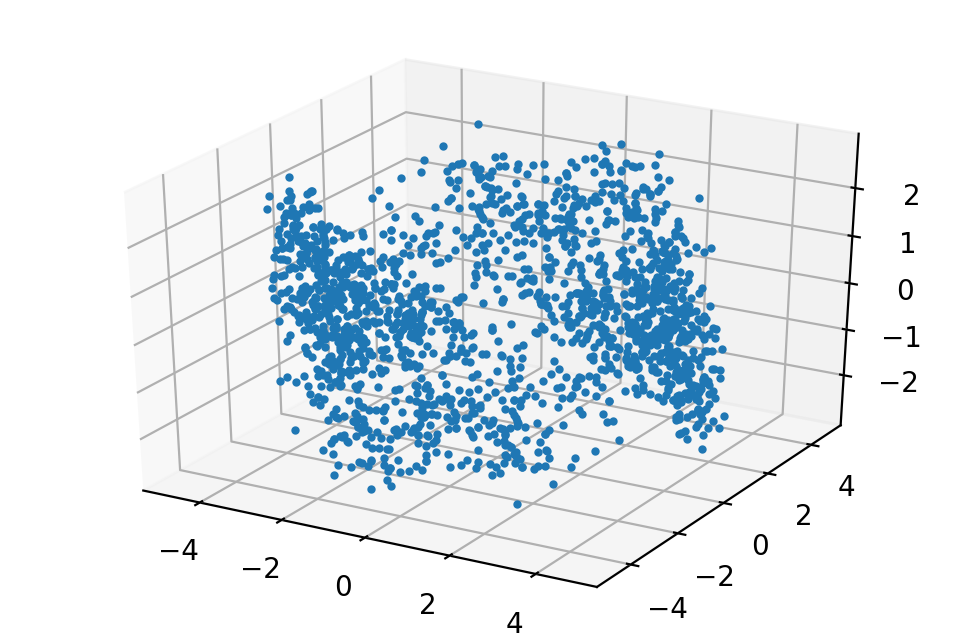

In [6]:
import useful

useful.scatter_3d(
    data_tr[:, :3].T, 
    rcParams=matplotlib.rcParams)